In [1]:
#词云可以将大段文本中的关键语句和词汇高亮展示，是文本语料的可视化
#使用sklearn的内置数据集20newsgroups生成，其中Token的大小代表了它们出现的次数

In [2]:
from nltk import data
data.path.append("/Users/leonwong/nltk_data")
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

from sklearn.datasets import fetch_20newsgroups #sklearn自带的新闻数据集
from wordcloud import WordCloud

In [3]:
#定义数据获取函数
def get_data(n):
    newsgroups_data_sample = fetch_20newsgroups(subset='train')
    text = str(newsgroups_data_sample['data'][:n])
    return text

In [4]:
#定义停用词，在原有的基础上添加了['\\n', 'n', '\\', '>', 'nlines', 'nI', "n'"]
def load_stopwords():
    other_stopwords_to_remove = ['\\n', 'n', '\\', '>', 'nlines', 'nI', "n'"]
    stop_words = stopwords.words('english')
    stop_words.extend(other_stopwords_to_remove)
    stop_words = set(stop_words) #set函数创建一个无序不重复元素集
    return stop_words

In [8]:
def generate_word_cloud(text, stopwords):
    wordcloud = WordCloud(
        width = 800, height = 100,
        background_color = 'white',
        max_words = 200,
        stopwords = stopwords,
        min_font_size = 10).generate(text)
    return wordcloud

In [9]:
text = get_data(100)

In [10]:
stop_words = load_stopwords()

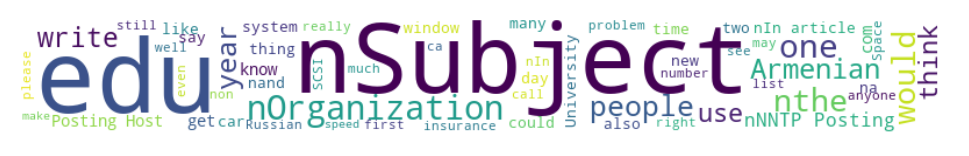

In [11]:
wordcloud = generate_word_cloud(text, stop_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()